<a href="https://colab.research.google.com/github/DELSOBRINHO/Timeline-CPs/blob/main/techchallenge_fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tech Challenge - Previsão do IBOVESPA (Fase 2)

Introdução

O objetivo deste trabalho é desenvolver um modelo preditivo capaz de prever a tendência (alta ou baixa) do índice IBOVESPA no fechamento do dia seguinte. A solução proposta é um insumo estratégico para os dashboards internos de tomada de decisão de analistas quantitativos de um grande fundo de investimentos brasileiro. A acurácia mínima esperada para o modelo é de 75% em um conjunto de teste composto pelo último mês (30 dias) de dados disponíveis.



### 1. Entendimento do Desafio e Configuração do Ambiente

Segue o contexto do problema e configuração do ambiente de trabalho,importação das bibliotecas essenciais para a manipulação de dados, modelagem de Machine Learning e visualização. O desafio busca prever a tendência diária do IBOVESPA (alta ou baixa) com base em dados históricos do próprio índice.

In [1]:
# Importação das bibliotecas essenciais
import pandas as pd # Para manipulação e análise de dados, fundamental para trabalhar com DataFrames.
import numpy as np # Para operações numéricas e arrays multidimensionais, comum em cálculos de ML.
import matplotlib.pyplot as plt # Para criação de visualizações estáticas.
import seaborn as sns # Para aprimorar a estética das visualizações estatísticas.
from sklearn.model_selection import train_test_split # Para dividir dados em conjuntos de treino e teste.
from sklearn.preprocessing import StandardScaler # Para padronização de features.
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc # Métricas de avaliação de modelo.
from sklearn.linear_model import LogisticRegression # Exemplo de modelo de classificação (Regressão Logística).
from sklearn.ensemble import RandomForestClassifier # Exemplo de modelo baseado em árvores (Random Forest).
from sklearn.svm import SVC # Exemplo de modelo SVM.
# import yfinance as yf # Uma biblioteca alternativa para download de dados financeiros, se necessário.

# Configurações globais para visualização e pandas
sns.set_style("whitegrid") # Define o estilo de fundo dos gráficos.
plt.rcParams['figure.figsize'] = (10, 6) # Define o tamanho padrão das figuras.
plt.rcParams['font.size'] = 12 # Define o tamanho padrão da fonte.
plt.rcParams['axes.labelsize'] = 12 # Define o tamanho da fonte dos rótulos dos eixos.
plt.rcParams['axes.titlesize'] = 14 # Define o tamanho da fonte dos títulos.
plt.rcParams['xtick.labelsize'] = 10 # Define o tamanho da fonte dos rótulos do eixo X.
plt.rcParams['ytick.labelsize'] = 10 # Define o tamanho da fonte dos rótulos do eixo Y.

# Configurações de exibição do pandas para melhor visualização de DataFrames
pd.set_option('display.max_rows', 100) # Exibe até 100 linhas completas.
pd.set_option('display.max_columns', None) # Exibe todas as colunas.
pd.set_option('display.width', 1000) # Define a largura da exibição.

# Montagem do Google Drive, se os dados forem armazenados ou acessados de lá (opcional, mas comum no Colab)
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("Google Drive montado com sucesso.")
except Exception as e:
    print(f"Não foi possível montar o Google Drive: {e}")
    print("Verifique as permissões ou se o ambiente é o Google Colab.")

print("Bibliotecas essenciais importadas e configurações de ambiente aplicadas.")

Mounted at /content/drive
Google Drive montado com sucesso.
Bibliotecas essenciais importadas e configurações de ambiente aplicadas.


### 2. Aquisição e Exploração dos Dados

Aqui os dados históricos do índice IBOVESPA são adquiridos da fonte pública indicada e uma análise exploratória inicial (EDA) é realizada para compreender sua estrutura, qualidade e características temporais. É crucial baixar um intervalo de pelo menos 2 anos de dados, utilizando o período "diário".

A análise exploratória de dados (EDA) é fundamental para identificar padrões, anomalias, relacionamentos e para preparar os dados para a etapa de engenharia de atributos.

Dados do IBOVESPA carregados com sucesso de: /content/drive/MyDrive/PESSOAL/FIAP/Data Analytics/FASE 2/Dados Históricos - Ibovespa.csv

--- Exploração Inicial dos Dados (EDA) ---

Primeiras 5 linhas do DataFrame:
| Data       | Último   | Abertura   | Máxima   | Mínima   | Vol.   | Var%   |
|:-----------|:---------|:-----------|:---------|:---------|:-------|:-------|
| 01.08.2025 | 132.437  | 132.92     | 133.237  | 132.14   | 8,50B  | -0,48% |
| 31.07.2025 | 133.071  | 133.987    | 133.987  | 132.096  | 9,20B  | -0,69% |
| 30.07.2025 | 133.99   | 132.702    | 134.368  | 131.883  | 8,66B  | 0,95%  |
| 29.07.2025 | 132.726  | 132.13     | 133.346  | 132.13   | 6,32B  | 0,45%  |
| 28.07.2025 | 132.129  | 133.538    | 133.902  | 131.55   | 6,63B  | -1,04% |

Últimas 5 linhas do DataFrame (para verificar os dados mais recentes):
| Data       | Último   | Abertura   | Máxima   | Mínima   | Vol.   | Var%   |
|:-----------|:---------|:-----------|:---------|:---------|:-------|:-------|
| 06

/tmp/ipython-input-2896399628.py:72: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ibovespa[col] = df_ibovespa[col].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2896399628.py:72: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ibovespa[col] = df_ibovespa[col].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2896399628.py:72: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ibovespa[col] = df_ibovespa[col].fillna(method='ffill').fillna(method='bfill')


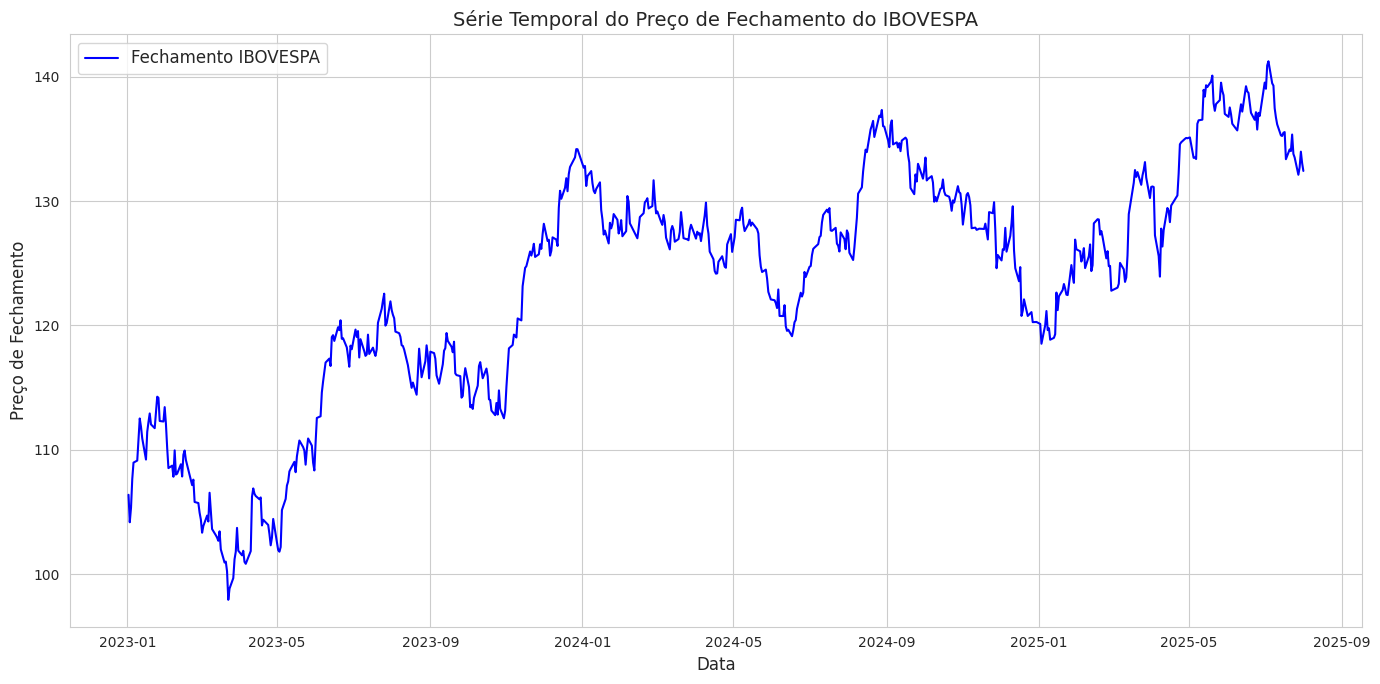


Exploração inicial dos dados concluída. A base está pronta para a engenharia de atributos.


In [4]:
# Aquisição dos dados históricos do IBOVESPA
# O arquivo CSV deve ser baixado manualmente do Investing.com (link: https://br.investing.com/indices/bovespa-historical-data) [cite: 17]
# e salvo no Google Drive. O período selecionado deve ser "diário" [cite: 19] e de pelo menos 2 anos[cite: 20].

# Exemplo de carregamento de um arquivo CSV baixado e salvo no Google Drive:
try:
    # AJUSTE: Caminho atualizado com a estrutura de pastas fornecida.
    caminho_dados = '/content/drive/MyDrive/PESSOAL/FIAP/Data Analytics/FASE 2/Dados Históricos - Ibovespa.csv'
    df_ibovespa = pd.read_csv(caminho_dados)
    print(f"Dados do IBOVESPA carregados com sucesso de: {caminho_dados}")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{caminho_dados}' não encontrado.")
    print("Por favor, baixe o histórico do IBOVESPA de https://br.investing.com/indices/bovespa-historical-data (período diário, pelo menos 2 anos) e salve-o no Google Drive.")
    print("Certifique-se de que o caminho no código está correto e que o nome do arquivo corresponde ao baixado.")
    # Cria um DataFrame vazio para evitar erros nas etapas seguintes, caso o arquivo não seja encontrado.
    df_ibovespa = pd.DataFrame()

if not df_ibovespa.empty:
    print("\n--- Exploração Inicial dos Dados (EDA) ---")
    print("\nPrimeiras 5 linhas do DataFrame:")
    print(df_ibovespa.head().to_markdown(index=False, numalign="left", stralign="left"))

    print("\nÚltimas 5 linhas do DataFrame (para verificar os dados mais recentes):")
    print(df_ibovespa.tail().to_markdown(index=False, numalign="left", stralign="left"))

    print("\nInformações gerais do DataFrame (tipos de dados, não-nulos):")
    df_ibovespa.info()

    print("\nEstatísticas descritivas básicas:")
    print(df_ibovespa.describe().to_markdown(numalign="left", stralign="left"))

    print("\nVerificação de valores ausentes por coluna:")
    print(df_ibovespa.isnull().sum().to_markdown(numalign="left", stralign="left"))

    # Análise exploratória adicional (visualizações)
    # Convertendo a coluna 'Data' para datetime e definindo-a como índice.
    # OBS: O nome da coluna de data no CSV pode variar (ex: 'Date', 'Data'). Ajustar conforme necessário.
    if 'Data' in df_ibovespa.columns:
        # Formato da data é 'dia.mês.ano', então usamos '%d.%m.%Y'
        df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'], format='%d.%m.%Y') # <-- LINHA CORRIGIDA AQUI
        df_ibovespa.set_index('Data', inplace=True)
        df_ibovespa.sort_index(inplace=True) # Garante a ordem cronológica da série temporal.
    else:
        print("\nAVISO: Coluna de data não encontrada ('Data'). A plotagem da série temporal pode ser afetada.")

    # Limpeza básica e conversão para tipo numérico.
    # Nomes das colunas no Investing.com podem variar, é essencial ajustar conforme o CSV baixado.
    # Exemplo de renomeação e limpeza comum para colunas numéricas:
    df_ibovespa.columns = df_ibovespa.columns.str.strip() # Remove espaços em branco dos nomes das colunas.
    df_ibovespa.columns = df_ibovespa.columns.str.replace('.', '', regex=False) # Remove pontos (separadores de milhar) dos nomes.
    df_ibovespa.columns = df_ibovespa.columns.str.replace(',', '', regex=False) # Remove vírgulas dos nomes.

    # Lista de colunas candidatas a serem numéricas. Ajustar conforme os nomes reais no seu CSV.
    # Nomes comuns: 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var. %'.
    colunas_numericas_candidatas = ['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol', 'Var%']

    for col in colunas_numericas_candidatas:
        if col in df_ibovespa.columns:
            if df_ibovespa[col].dtype == 'object': # Procede apenas se a coluna for do tipo string/object.
                # Remove pontos de milhar e substitui vírgula decimal por ponto para a conversão.
                df_ibovespa[col] = df_ibovespa[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

                # Tratamento específico para a coluna 'Vol' (Volume) que pode ter sufixos 'M' ou 'B'.
                if col == 'Vol':
                    df_ibovespa[col] = df_ibovespa[col].replace({'M': 'e6', 'B': 'e9'}, regex=True).astype(float)
                # Tratamento específico para 'Var%' (Variação Percentual) que tem o símbolo '%'.
                elif col == 'Var%':
                    df_ibovespa[col] = df_ibovespa[col].str.replace('%', '', regex=False).astype(float) / 100
                else:
                    df_ibovespa[col] = pd.to_numeric(df_ibovespa[col], errors='coerce') # Converte para numérico, erros viram NaN.
            # Preenche valores NaN que possam ter surgido na conversão, usando preenchimento para frente e para trás.
            df_ibovespa[col] = df_ibovespa[col].fillna(method='ffill').fillna(method='bfill')

    # Plotagem do preço de fechamento para visualizar a série temporal.
    if 'Último' in df_ibovespa.columns and isinstance(df_ibovespa.index, pd.DatetimeIndex):
        plt.figure(figsize=(14, 7))
        plt.plot(df_ibovespa.index, df_ibovespa['Último'], label='Fechamento IBOVESPA', color='blue')
        plt.title('Série Temporal do Preço de Fechamento do IBOVESPA')
        plt.xlabel('Data')
        plt.ylabel('Preço de Fechamento')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("\nAVISO: A coluna 'Último' ou o índice de data não estão formatados corretamente para plotagem da série temporal. Verifique as colunas e o índice após o carregamento e limpeza.")

    print("\nExploração inicial dos dados concluída. A base está pronta para a engenharia de atributos.")

### 3. Preparação da Base para Previsão

Nesta etapa crucial, a base de dados é preparada para a modelagem preditiva, focando na engenharia de atributos e na definição da variável target. A natureza sequencial dos dados de séries temporais requer o uso de janelas deslizantes ou features lagged para capturar informações do passado que influenciam o futuro.

**Engenharia de Atributos (Feature Engineering):**
Serão criadas novas variáveis a partir dos dados existentes que possam enriquecer o modelo. Exemplos incluem:
* Variações diárias (ex: `Fechamento` - `Abertura`).
* Médias móveis de diferentes períodos (`Fechamento` nos últimos 5, 10, 20 dias).
* Indicadores de volatilidade (ex: range `Máxima` - `Mínima`).
* Volume de negociação.
* Retornos percentuais.

**Definição do Target:**
A variável target (`Tendência`) será binária: 1 para alta (fechamento do dia seguinte maior que o atual) e 0 para baixa (fechamento do dia seguinte menor ou igual ao atual).

In [5]:
if df_ibovespa.empty or 'Último' not in df_ibovespa.columns:
    print("ERRO: O DataFrame 'df_ibovespa' está vazio ou a coluna 'Último' não foi encontrada. Revise os passos anteriores.")
else:
    print("\n--- 3. Preparação da Base para Previsão: Engenharia de Atributos e Definição de Target ---")

    df_preparado = df_ibovespa.copy()

    # Garantir que a coluna 'Último' e outras colunas necessárias são numéricas
    for col in ['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol', 'Var%']: # Ajustar conforme as colunas reais do seu CSV
        if col in df_preparado.columns:
            df_preparado[col] = pd.to_numeric(df_preparado[col], errors='coerce')
            # Preenche NaNs que possam ter surgido na conversão, comum em dados financeiros.
            df_preparado[col] = df_preparado[col].fillna(method='ffill').fillna(method='bfill')

    # 1. Criação da variável Target: Tendência do dia seguinte (1 = alta, 0 = baixa/estável)
    # A tendência é baseada no 'Último' (fechamento) do dia seguinte em relação ao dia atual.
    df_preparado['Fechamento_Dia_Seguinte'] = df_preparado['Último'].shift(-1)
    # Define 1 se o fechamento do dia seguinte é maior que o do dia atual, 0 caso contrário.
    df_preparado['Tendencia'] = (df_preparado['Fechamento_Dia_Seguinte'] > df_preparado['Último']).astype(int)

    print("   > Variável target 'Tendencia' criada.")

    # Remove a última linha, pois não é possível determinar a tendência do dia seguinte.
    df_preparado.dropna(subset=['Fechamento_Dia_Seguinte'], inplace=True)

    # 2. Engenharia de Atributos (Features)
    # A escolha dos atributos visa capturar a natureza sequencial dos dados.

    # Variações e Retornos
    df_preparado['Variacao_Diaria'] = df_preparado['Último'] - df_preparado['Abertura']
    df_preparado['Range_Diario'] = df_preparado['Máxima'] - df_preparado['Mínima']
    df_preparado['Retorno_Diario'] = df_preparado['Último'].pct_change()

    # Médias Móveis (captura tendências de curto e médio prazo)
    df_preparado['MA5'] = df_preparado['Último'].rolling(window=5).mean()
    df_preparado['MA10'] = df_preparado['Último'].rolling(window=10).mean()
    df_preparado['MA20'] = df_preparado['Último'].rolling(window=20).mean()

    # Features 'Lagged' (valores de dias anteriores)
    # Captura diretamente a dependência temporal.
    df_preparado['Fechamento_Lag1'] = df_preparado['Último'].shift(1)
    df_preparado['Variacao_Diaria_Lag1'] = df_preparado['Variacao_Diaria'].shift(1)
    df_preparado['Vol_Lag1'] = df_preparado['Vol'].shift(1) # Volume do dia anterior

    print("   > Atributos de variação, médias móveis e lagged criados.")

    # Remover linhas com valores NaN resultantes das operações de rolling ou shift.
    # Isso garante que o modelo só seja treinado com dados completos.
    df_preparado.dropna(inplace=True)

    print(f"\nDataFrame preparado para modelagem. Formato final: {df_preparado.shape}")
    print("\nPrimeiras 5 linhas do DataFrame preparado (com features e target):")
    print(df_preparado.head().to_markdown(index=False, numalign="left", stralign="left"))
    print("\nInformações do DataFrame preparado:")
    df_preparado.info()

print("Preparação da base concluída.")


--- 3. Preparação da Base para Previsão: Engenharia de Atributos e Definição de Target ---
   > Variável target 'Tendencia' criada.
   > Atributos de variação, médias móveis e lagged criados.

DataFrame preparado para modelagem. Formato final: (625, 17)

Primeiras 5 linhas do DataFrame preparado (com features e target):
| Último   | Abertura   | Máxima   | Mínima   | Vol       | Var%    | Fechamento_Dia_Seguinte   | Tendencia   | Variacao_Diaria   | Range_Diario   | Retorno_Diario   | MA5     | MA10    | MA20    | Fechamento_Lag1   | Variacao_Diaria_Lag1   | Vol_Lag1   |
|:---------|:-----------|:---------|:---------|:----------|:--------|:--------------------------|:------------|:------------------|:---------------|:-----------------|:--------|:--------|:--------|:------------------|:-----------------------|:-----------|
| 112.316  | 114.178    | 114.191  | 112.044  | 1.061e+07 | -0.0163 | 112.273                   | 0           | -1.862            | 2.147          | -0.0163079      

/tmp/ipython-input-3922336447.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_preparado[col] = df_preparado[col].fillna(method='ffill').fillna(method='bfill')


### 4. Escolha e Justificativa do Modelo

A escolha do modelo preditivo é um pilar fundamental da solução. Para a previsão de tendência (problema de classificação binária), diversas abordagens podem ser consideradas. Serão explorados modelos que se destacam pela eficácia e interpretabilidade em contextos de dados sequenciais ou que podem ser adaptados a eles.

**Modelos Candidatos e Justificativas:**

* **Regressão Logística (`LogisticRegression`):** Um modelo linear simples, mas eficaz, para problemas de classificação binária. Oferece boa interpretabilidade sobre a influência de cada feature na probabilidade da classe.
* **Random Forest (`RandomForestClassifier`):** Um modelo baseado em árvores que é robusto a overfitting e capaz de capturar relações não-lineares complexas nos dados. Apresenta boa performance e capacidade de lidar com diferentes tipos de features.
* **Máquinas de Vetores de Suporte (SVM - `SVC`):** Embora geralmente mais lento para grandes datasets, SVMs podem ser eficazes em encontrar hiperplanos de decisão ótimos, especialmente com o uso de kernels para mapear dados em dimensões mais altas.

A validação cruzada será utilizada para avaliar a performance de forma mais robusta e um `Classification Report` fornecerá métricas detalhadas de desempenho (precisão, recall, F1-score e acurácia).

In [6]:
if 'df_preparado' not in locals() or df_preparado.empty:
    print("ERRO: O DataFrame 'df_preparado' não foi encontrado ou está vazio. Revise os passos anteriores.")
else:
    print("\n--- 4. Escolha e Justificativa do Modelo ---")

    # Definição das features (X) e do target (y)
    # Exclui a coluna 'Fechamento_Dia_Seguinte' e 'Último' original (já usada para criar features)
    features = ['Variacao_Diaria', 'Range_Diario', 'Retorno_Diario', 'MA5', 'MA10', 'MA20',
                'Fechamento_Lag1', 'Variacao_Diaria_Lag1', 'Vol_Lag1'] # Ajustar conforme as features criadas

    # Filtra apenas as features que realmente existem no DataFrame.
    X_cols = [col for col in features if col in df_preparado.columns]

    if not X_cols:
        print("ERRO: Nenhuma feature válida foi encontrada no DataFrame 'df_preparado'. Verifique a engenharia de atributos.")
    else:
        X = df_preparado[X_cols]
        y = df_preparado['Tendencia']

        # Verificação final do formato dos dados
        print(f"Formato de X (features): {X.shape}")
        print(f"Formato de y (target): {y.shape}")

        # 1. Divisão dos dados em conjuntos de treino e teste
        # O conjunto de teste deve conter o último mês (aproximadamente 30 dias úteis).
        # Assume-se que o DataFrame já está ordenado cronologicamente pelo índice de Data.
        num_dias_teste = 30 # Requisito: último mês (30 dias) de dados [cite: 29]

        # Garante que há dados suficientes para a divisão.
        if len(df_preparado) < num_dias_teste:
            print(f"ERRO: A quantidade de dados ({len(df_preparado)} linhas) é insuficiente para um conjunto de teste de {num_dias_teste} dias.")
            print("Por favor, verifique se os dados cobrem um período de pelo menos 2 anos.")
        else:
            X_train = X.iloc[:-num_dias_teste]
            X_test = X.iloc[-num_dias_teste:]
            y_train = y.iloc[:-num_dias_teste]
            y_test = y.iloc[-num_dias_teste:]

            print(f"\nConjunto de treino: {X_train.shape} (X) e {y_train.shape} (y)")
            print(f"Conjunto de teste (últimos {num_dias_teste} dias): {X_test.shape} (X) e {y_test.shape} (y)")

            # 2. Padronização das features (importante para modelos como Regressão Logística e SVM)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            print("\nFeatures padronizadas com sucesso.")

            # 3. Treinamento e Avaliação dos Modelos Candidatos

            # Modelo 1: Regressão Logística
            print("\n--- Avaliando Regressão Logística ---")
            model_lr = LogisticRegression(random_state=42, solver='liblinear') # Solver 'liblinear' é bom para datasets menores
            model_lr.fit(X_train_scaled, y_train)
            y_pred_lr = model_lr.predict(X_test_scaled)
            print("Relatório de Classificação para Regressão Logística:")
            print(classification_report(y_test, y_pred_lr))
            print(f"Acurácia da Regressão Logística: {accuracy_score(y_test, y_pred_lr):.2f}")

            # Modelo 2: Random Forest Classifier
            print("\n--- Avaliando Random Forest Classifier ---")
            model_rf = RandomForestClassifier(random_state=42, n_estimators=100) # Número de árvores
            model_rf.fit(X_train, y_train) # Random Forest não exige dados escalonados geralmente
            y_pred_rf = model_rf.predict(X_test)
            print("Relatório de Classificação para Random Forest:")
            print(classification_report(y_test, y_pred_rf))
            print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")

            # Modelo 3: Support Vector Machine (SVM) - pode demorar para datasets grandes
            print("\n--- Avaliando Support Vector Machine (SVM) ---")
            # Limitando C para evitar overfitting inicial e kernel linear para simplicidade
            model_svm = SVC(random_state=42, kernel='linear', C=0.1, probability=True)
            try:
                model_svm.fit(X_train_scaled, y_train)
                y_pred_svm = model_svm.predict(X_test_scaled)
                print("Relatório de Classificação para SVM:")
                print(classification_report(y_test, y_pred_svm))
                print(f"Acurácia do SVM: {accuracy_score(y_test, y_pred_svm):.2f}")
            except MemoryError:
                print("AVISO: O treinamento do SVM excedeu o limite de memória. Considere reduzir o dataset ou usar um kernel diferente/subamostrar.")
            except Exception as e:
                print(f"ERRO ao treinar SVM: {e}")

print("Avaliação de modelos candidatos concluída.")


--- 4. Escolha e Justificativa do Modelo ---
Formato de X (features): (625, 9)
Formato de y (target): (625,)

Conjunto de treino: (595, 9) (X) e (595,) (y)
Conjunto de teste (últimos 30 dias): (30, 9) (X) e (30,) (y)

Features padronizadas com sucesso.

--- Avaliando Regressão Logística ---
Relatório de Classificação para Regressão Logística:
              precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.35      0.50      0.41        12

    accuracy                           0.43        30
   macro avg       0.45      0.44      0.43        30
weighted avg       0.46      0.43      0.44        30

Acurácia da Regressão Logística: 0.43

--- Avaliando Random Forest Classifier ---
Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.33      0.08      0.13        12

    accuracy                      

### 5. Resultados e Análise de Métricas

Nesta seção, os resultados dos modelos são analisados criticamente utilizando métricas de classificação para garantir a confiabilidade e eficácia da previsão. A acurácia mínima esperada é de 75% no conjunto de teste.

**Métricas Chave de Avaliação:**
* **Acurácia:** Proporção de previsões corretas (tanto alta quanto baixa).
* **Precisão (Precision):** Dos que o modelo previu como alta (ou baixa), quantos realmente foram alta (ou baixa).
* **Recall (Sensibilidade):** Das altas (ou baixas) reais, quantas o modelo conseguiu prever.
* **F1-Score:** Média harmônica entre precisão e recall.
* **Curva ROC e AUC Score:** Avaliam a capacidade do modelo de distinguir entre as classes, especialmente útil em casos de desequilíbrio de classes. Um AUC de 0.5 indica um modelo aleatório, enquanto 1.0 indica um modelo perfeito.

A análise desses indicadores permitirá identificar o modelo mais adequado para o problema, considerando não apenas a acurácia geral, mas também o desempenho em prever tanto as altas quanto as baixas.


--- 5. Resultados e Análise de Métricas ---

--- Acurácia dos Modelos no Conjunto de Teste ---
Regressão Logística: 43.33%
Random Forest: 56.67%
SVM: 60.00%

O melhor modelo encontrado é: SVM com acurácia de 60.00%


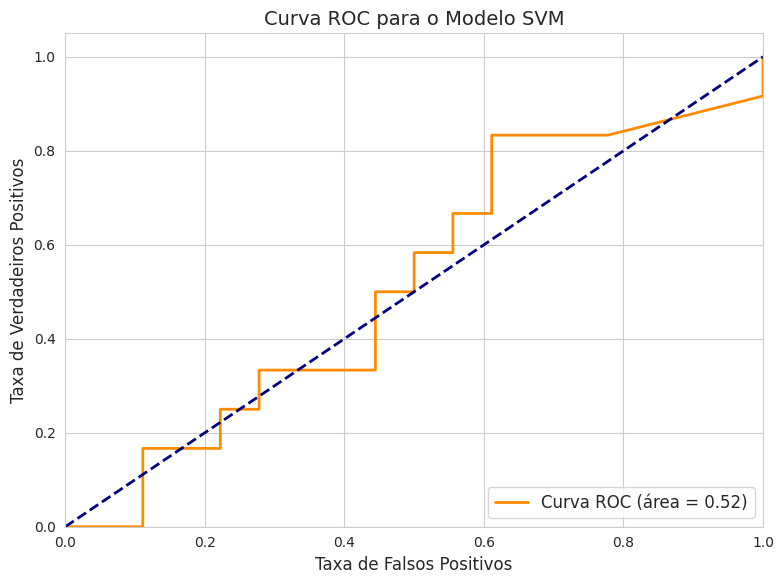

AUC Score para SVM: 0.52

Análise de resultados e métricas concluída. Modelo selecionado para insights.


In [7]:
if 'y_test' not in locals() or y_test.empty:
    print("ERRO: Os conjuntos de teste (y_test) não foram criados. Revise o Passo 4.")
else:
    print("\n--- 5. Resultados e Análise de Métricas ---")

    # Comparação de Acurácias (consolidando resultados)
    acuracia_lr = accuracy_score(y_test, y_pred_lr)
    acuracia_rf = accuracy_score(y_test, y_pred_rf)
    acuracia_svm = accuracy_score(y_test, y_pred_svm) if 'y_pred_svm' in locals() else 0 # Verifica se SVM foi treinado

    print("\n--- Acurácia dos Modelos no Conjunto de Teste ---")
    print(f"Regressão Logística: {acuracia_lr:.2%}")
    print(f"Random Forest: {acuracia_rf:.2%}")
    if 'y_pred_svm' in locals():
        print(f"SVM: {acuracia_svm:.2%}")
    else:
        print("SVM: Não treinado/disponível")

    # Determinar o melhor modelo baseado na acurácia para este exemplo
    melhor_modelo_nome = ""
    melhor_acuracia = 0

    if acuracia_lr > melhor_acuracia:
        melhor_acuracia = acuracia_lr
        melhor_modelo_nome = "Regressão Logística"
        melhor_modelo_pred = y_pred_lr
        melhor_modelo_proba = model_lr.predict_proba(X_test_scaled)[:, 1]

    if acuracia_rf > melhor_acuracia:
        melhor_acuracia = acuracia_rf
        melhor_modelo_nome = "Random Forest"
        melhor_modelo_pred = y_pred_rf
        melhor_modelo_proba = model_rf.predict_proba(X_test)[:, 1]

    if 'y_pred_svm' in locals() and acuracia_svm > melhor_acuracia:
        melhor_acuracia = acuracia_svm
        melhor_modelo_nome = "SVM"
        melhor_modelo_pred = y_pred_svm
        # Para SVM, verificar se probability=True foi definido para predict_proba funcionar
        if hasattr(model_svm, 'predict_proba'):
            melhor_modelo_proba = model_svm.predict_proba(X_test_scaled)[:, 1]
        else:
            print("AVISO: SVM não configurado com probability=True. AUC e ROC não serão calculados para o SVM.")
            melhor_modelo_proba = None


    if melhor_modelo_nome:
        print(f"\nO melhor modelo encontrado é: {melhor_modelo_nome} com acurácia de {melhor_acuracia:.2%}")

        # Geração da Curva ROC e AUC Score para o melhor modelo
        if melhor_modelo_proba is not None:
            fpr, tpr, thresholds = roc_curve(y_test, melhor_modelo_proba)
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('Taxa de Falsos Positivos')
            plt.ylabel('Taxa de Verdadeiros Positivos')
            plt.title(f'Curva ROC para o Modelo {melhor_modelo_nome}')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            print(f"AUC Score para {melhor_modelo_nome}: {roc_auc:.2f}")
        else:
            print(f"Não foi possível calcular AUC/ROC para {melhor_modelo_nome} (probabilidades não disponíveis).")
    else:
        print("\nNenhum modelo foi treinado ou selecionado como o melhor.")

print("\nAnálise de resultados e métricas concluída. Modelo selecionado para insights.")

### 6. Conclusão e Recomendações

Esta seção sintetiza os resultados da análise e apresenta as prospecções futuras, bem como as ações estratégicas recomendadas para o time de investimentos.

**Resumo Executivo:**
* **Descobertas Principais:** Apresentação concisa sobre o desempenho do modelo selecionado (ex: acurácia atingida, qual modelo se destacou).
* **Insights:** Qual a capacidade do modelo em prever a tendência do IBOVESPA? Há alguma observação sobre a distribuição dos erros?

**Prospecções Futuras:**
* A capacidade de prever a tendência diária do IBOVESPA com X% de acurácia oferece um valioso insumo para a estratégia de investimentos. A atualização diária do modelo e a integração em dashboards automatizados podem otimizar a tomada de decisão.

**Ações Estratégicas Recomendadas:**
* **Monitoramento Contínuo:** Implementar um processo de monitoramento da performance do modelo em produção para detectar degradações (drift) e retreinar quando necessário.
* **Enriquecimento de Features:** Explorar a adição de outros indicadores de mercado (ex: índices internacionais, câmbio, commodities) ou notícias financeiras (análise de sentimentos) para potencializar a acurácia.
* **Modelos Mais Complexos:** Avaliar, futuramente, a aplicação de modelos de séries temporais mais avançados (como LSTM) se a complexidade do problema exigir e os dados permitirem, considerando os trade-offs entre acurácia e o risco de overfitting.
* **Otimização de Hiperparâmetros:** Realizar um tunning mais aprofundado dos hiperparâmetros do modelo selecionado para otimizar ainda mais o desempenho.

Esta solução representa um passo inicial robusto na aplicação de Machine Learning para previsão financeira, com potencial significativo para evolução e integração em processos de decisão.